In [9]:
from scipy.io import wavfile
import os
import numpy as np

In [10]:
# Useful constants
MAX_VALUE_AUDIO = 32768.0 # Max value (to normalize)

In [11]:
# We will analyze all the digits spoken by the same speaker (arbitrarily chosen)
path_dir = 'recordings'
name_to_analyze = 'jackson'
datanames = [str(i) + "_" + name_to_analyze + "_0.wav" for i in range(0,10)]
files_dict = {}
digit = 0
for file in datanames:
    fs, current_audio = wavfile.read(os.path.join(path_dir, file))
    current_audio = current_audio.astype(np.float32, order='C') / MAX_VALUE_AUDIO
    files_dict[digit] = current_audio
    digit += 1
    

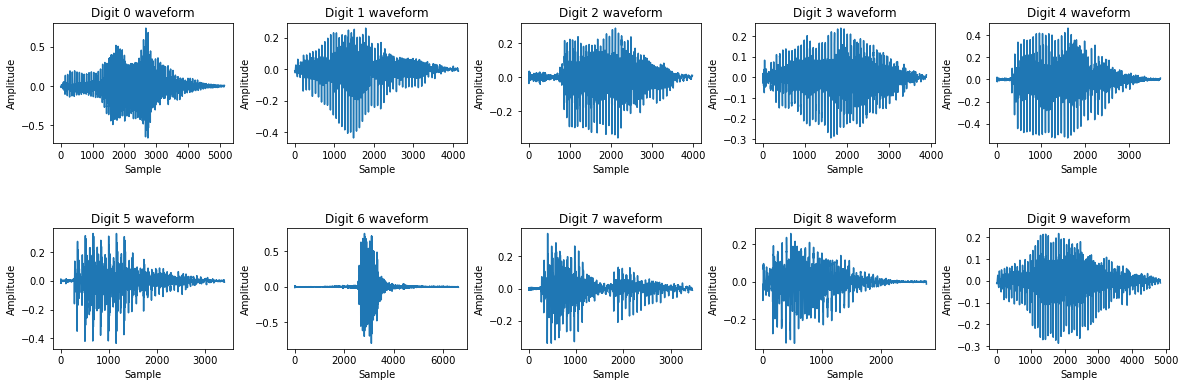

In [32]:
# Plot waveforms
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
fig.subplots_adjust(hspace=0.7, wspace=0.3)
for digit in range(0, 10):
    plt.subplot(2, 5, digit + 1)
    plt.plot(files_dict[digit])
    plt.title('Digit ' + str(digit) + ' waveform')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

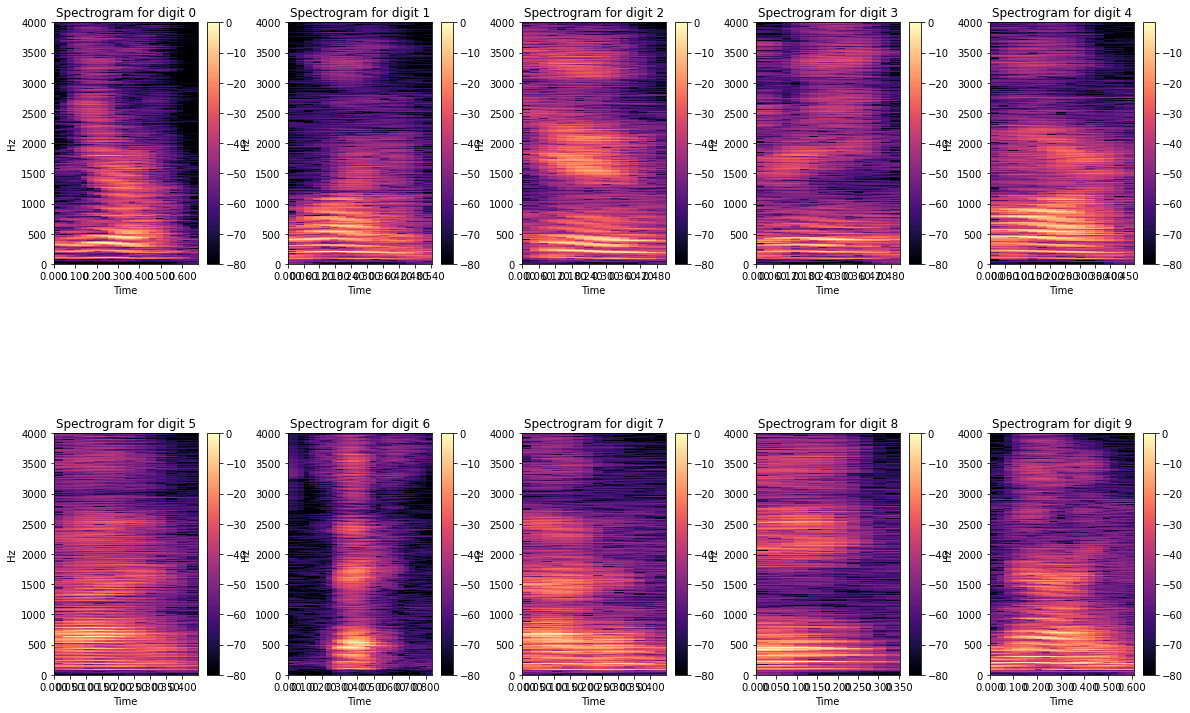

In [75]:
# Now do the same but in the spectral domain
import librosa.display
import librosa
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(20, 12))
fig.subplots_adjust(hspace=0.7, wspace=0.3)
digit = 0
for row in range(0, 2):
    for col in range(0, 5):
    #plt.subplot(2, 5, digit + 1)
        D = librosa.stft(files_dict[digit], hop_length=256, n_fft = 2048)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        img = librosa.display.specshow(S_db, sr=fs, hop_length=256, x_axis='time', y_axis='linear', ax=axs[row, col])
        axs[row, col].set(title='Spectrogram for digit ' + str(digit))
        digit += 1
        fig.colorbar(img, ax=axs[row, col])